In [1]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [18]:
df = pd.read_csv(r"frequent_terms.csv",encoding='utf-8')
comment_words = '' 
stopwords = set(STOPWORDS) 


In [22]:
# iterate through the csv file 
for index, val in df.iterrows(): 
      
    # typecaste each val to string 
    val = str(val['term'])
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

In [23]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

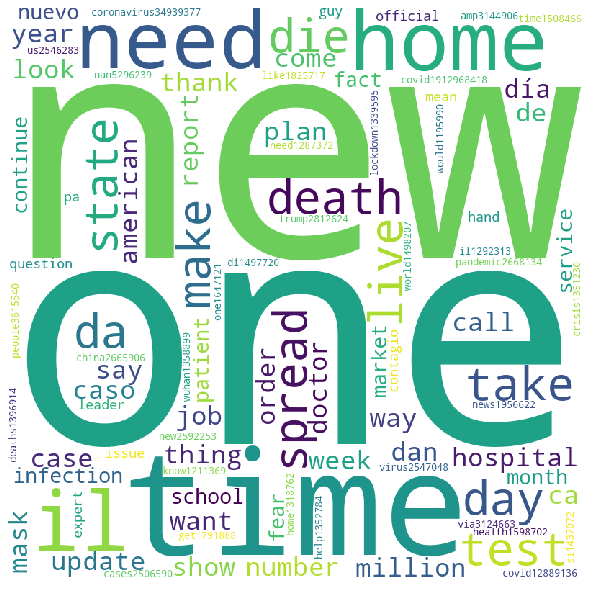

In [25]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [29]:
df.shape

(1000, 2)

In [45]:
stats = df.groupby("term")
stats.describe()

counts                                                             \
      count       mean std        min        25%        50%        75%   
term                                                                     
00      1.0   170297.0 NaN   170297.0   170297.0   170297.0   170297.0   
000     1.0  1286928.0 NaN  1286928.0  1286928.0  1286928.0  1286928.0   
03      1.0   137985.0 NaN   137985.0   137985.0   137985.0   137985.0   
04      1.0   134238.0 NaN   134238.0   134238.0   134238.0   134238.0   
10      1.0   773314.0 NaN   773314.0   773314.0   773314.0   773314.0   
...     ...        ...  ..        ...        ...        ...        ...   
être    1.0   136951.0 NaN   136951.0   136951.0   136951.0   136951.0   
और      1.0   147009.0 NaN   147009.0   147009.0   147009.0   147009.0   
कर      1.0   254516.0 NaN   254516.0   254516.0   254516.0   254516.0   
पर      1.0   173157.0 NaN   173157.0   173157.0   173157.0   173157.0   
रह      1.0   170767.0 NaN   170767.0   170767.0   170767.0   170767.0   

                 
            max  
term             
00     170297.0  
000   1286928.0  
03     137985.0  
04     134238.0  
10     773314.0  
...         ...  
être   136951.0  
और     147009.0  
कर     254516.0  
पर     173157.0  
रह     170767.0  

[999 rows x 8 columns]

In [68]:
freq = pd.DataFrame(stats.mean().sort_values(by="counts",ascending=False).head(10)) #top 5 words used.

In [61]:
stats.head()

,term,counts
0,coronavirus,34939377
1,covid19,12968418
2,covid,12889136
3,19,12359270
4,NaN,5296239
...,...,...
995,só,129279
996,ta,129067
997,31,129018
998,wish,128512


<Figure size 1080x720 with 0 Axes>

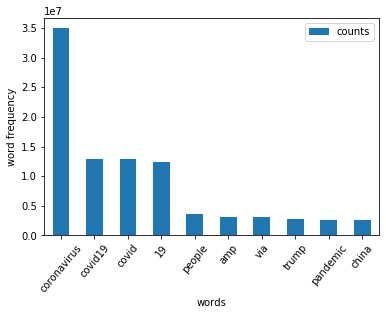

In [69]:
plt.figure(figsize=(15,10))
freq.sort_values(by="counts",ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("words")
plt.ylabel("word frequency")
plt.show()